# RAKAM TANIMA UYGULAMASI

---

[<img align="left" width="100" height="100" src="https://images.cdn2.stockunlimited.net/clipart/letter-a_1995332.jpg">](https://www.ayyucekizrak.com/)
[<img align="right" width="200" height="50"  src="https://raw.githubusercontent.com/deeplearningturkiye/pratik-derin-ogrenme-uygulamalari/944a247d404741ba37b9ef74de0716acff6fd4f9/images/dltr_logo.png">](https://deeplearningturkiye.com/)

**Colab** için kimlik doğrulama adımları:

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp1ni9xxa2/pubring.gpg' created
gpg: /tmp/tmp1ni9xxa2/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


UnboundLocalError: ignored

### Kurulum ve Kontroller

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17406991080642980702, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 183500800
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4854968716796667022
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

**Drive da dosya konumlandırmayı yapma işlemleri**

In [5]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
datalab  drive


In [6]:
!ls drive

araguler.jpg		  NesneTanima	      titanic
Colab Notebooks		  Python_Giris.ipynb  VeriArtirma
dinazor			  Python Numpy Giriş  Veri_Artirma
DuyguTanima		  RakamTanima	      YOLO_NesneYeriTespiti
EvrisimliSinirAglari	  StyleTransfer
KapsulAglari_MNIST.ipynb  TBMM_Corpus


In [7]:
import os 
os.chdir("/content/drive/RakamTanima")
!pwd

/content/drive/RakamTanima


In [8]:
!ls

RakamTanima_MNIST.ipynb  save_models  Uygulama_RakamTanima.ipynb


In [0]:
!pip install -q keras

### Uygulama Başlangıç

In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Veriden örnekleri görselleştirme

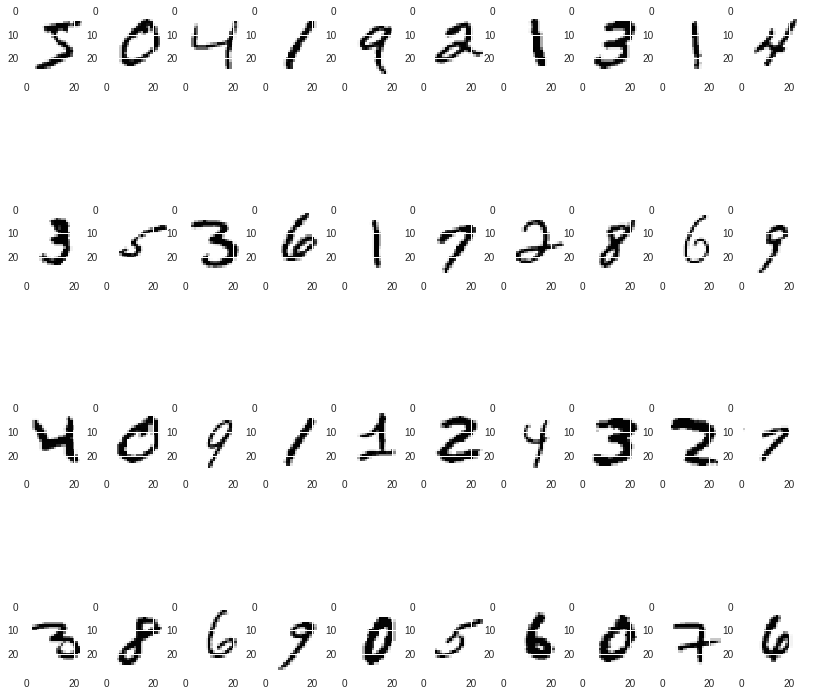

In [12]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

In [0]:
batch_size = 128 
num_classes = 10 
epochs = 6 # 12 epoch önerilir

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## MODEL OLUŞTURMA

In [0]:
model = Sequential() 

**Katlanların oluşturulması**

In [0]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

Modell Görselleştirme


In [17]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:

model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

### Eğitim İşlemleri

In [19]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 12s 195us/step - loss: 2.4778 - acc: 0.7914 - val_loss: 0.0729 - val_acc: 0.9784
Epoch 2/6
60000/60000 [==============================] - 10s 164us/step - loss: 0.1152 - acc: 0.9668 - val_loss: 0.0437 - val_acc: 0.9854
Epoch 3/6
60000/60000 [==============================] - 10s 164us/step - loss: 0.0824 - acc: 0.9769 - val_loss: 0.0374 - val_acc: 0.9870
Epoch 4/6
60000/60000 [==============================] - 10s 163us/step - loss: 0.0652 - acc: 0.9808 - val_loss: 0.0333 - val_acc: 0.9896
Epoch 5/6
60000/60000 [==============================] - 10s 168us/step - loss: 0.0543 - acc: 0.9839 - val_loss: 0.0323 - val_acc: 0.9900
Epoch 6/6
60000/60000 [==============================] - 10s 163us/step - loss: 0.0488 - acc: 0.9852 - val_loss: 0.0330 - val_acc: 0.9896


In [0]:
model.save('save_models/mnist_model.h5')

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


Test Loss: 0.03304198571913785
Test Accuracy: 0.9896


**Rastgele değer için test işlemi**

In [0]:
model_test = model.save('save_models/mnist_model.h5')

In [42]:
test_image = x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

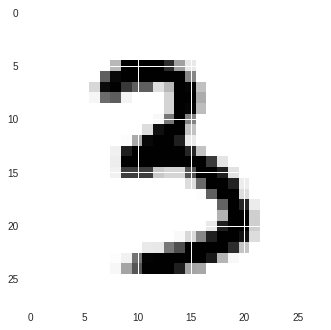

In [43]:
plt.imshow(test_image.reshape(28,28))

In [0]:
test_data = x_test[32].reshape(1,28,28,1)
pre=model_test.predict(test_data, batch_size=1)